In [3]:
import sympy as sp
import numpy as np

# Pregunta 1

 El número áureo $\phi$ satisface la ecuación 
 $$ \phi = 1+ \frac{1}{\phi}. $$
 de donde se puede obtener de manera relativamente sencilla que
 $$ \phi = \frac{1+\sqrt{5}}{2} $$

## a. Calcule directamente en Python el valor de $\phi$.

### Respuesta:

In [4]:
phi= (1+np.sqrt(5))/2
phi

1.618033988749895

b. Defina una función adecuada para utilizar el método de la bisección y aproxime el valor de $\phi$, justificando la elección del intervalo elegido, con una tolerancia de $10^{-6}$.

A partir de la ecuación
$$ \phi = 1+ \frac{1}{\phi} $$

se sigue que
$$ \phi ^2 = \phi +1, $$

luego basta con definir la función 
$$ f(\phi) = \phi^2-\phi-1 $$

cuya raíz positiva, corresponde a una aproximación de $\phi$.

Con el resultado obtenido en a. se intuye que un buen punto de partida es el intervalo $[1,2]$. Verificamos si se cumplen las hipótesis del Teorema de Bolzano con esta elección. Notamos que

$$ f(1)= -1 < 0$$
y
$$ f(2)= 1 > 0 $$

por tanto se satisfacen las condiciones y es posible aplicar el método de la bisección utilizando el código acontinuación:

In [5]:
def f(phi): return phi**2-phi-1 

def biseccion(a,b,f,tolerancia):
    while (np.abs(a-b)>=tolerancia):
        xi = (a+b)/2.0
        prod = f(a)*f(xi)
        if prod<0:
            b = xi
        else:
            if prod>0:
                a = xi
            else:
                if prod==0:
                    a = xi
                    b = xi
    return xi

biseccion(1,2,f,1e-6)

1.6180334091186523

Por tanto, una aproximación de $\phi$ vía Método de bisección con una tolerancia de $10^{-6}$ es

$$ \phi \approx 1.6180334091186523 $$

c. El método de la secante es una variación del método de Newton Rhapson, donde en vez de calcular la derivada de la función, ésta se sustituye por una aproximación de la pendiente de la recta tangente $f'(x_{n+1})\approx \dfrac{f(x_n)-f(x_{n-1})}{x_n - x_{n-1}} $  , resultando en el siguiente algoritmo:


* Datos de entrada: $x_0 , x_1,$tolerancia, función
* Para $n=1,2,3...$ calcular
$$ x_{n+1}=x_n - \left[ \frac{x_n-x_{n-1}}{f(x_n)-f(x_{n-1})} \right] f(x_n) $$
hasta que $|x_{n+1}-x_n|<$tolerancia


Elabore un código en Python para dicho algoritmo.

In [6]:
def secante(f, x0, x1, tol):   
    while (np.abs(x0-x1)>=tol):
        x2 = x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
        x0 = x1
        x1 = x2
    return x2

d. Utilice el código del item (c) con una tolerancia de $10^{-6}$ para encontrar una aproximación de $\phi$.

Puesto que el método es una modificación del método de Newton-Rhapson, es necesario que los puntos $x_0$ y $x_1$ de partida sean puntos cercanos a la raíz. En este caso, basta con utilizar (por ejemplo) $x_0=1$ y $x_1=1$ como en el método anterior. Considerando la misma tolerancia, resulta lo siguiente:

In [7]:
secante(f,1,2,1e-6)

1.6180339887499087

Por tanto, una aproximación de $\phi$ vía Método de la secante con una tolerancia de $10^{-6}$ es

$$ \phi \approx 1.6180339887499087 $$

e. Suponga que el valor máquina encontrado en (a) es el valor real de $\phi$. Calcule el error cometido con cada uno de los métodos y concluya cuál de ellos entrega una mejor aproximación.

Para concluir cuál de los métodos en mas certero, basta con calcular 

$$ E = \vert \phi - x_n \vert, $$

donde $\phi$ es el valor obtenido en a. y $x_n$ la aproximación obtenida con cada método.

In [8]:
Error_Biseccion = np.abs(phi - biseccion(1,2,f,1e-6))
Error_Biseccion

5.796312425587757e-07

In [9]:
Error_Secante = np.abs(phi-secante(f,1,2,1e-6))
Error_Secante

1.3766765505351941e-14

Comparamos cuál de los errores cometidos es más pequeño. A simple vista notamos que el error cometido por el método de la secante es mucho mas pequeño. Podemos verificar nuestro resultado con el siguiente código:

In [11]:
if Error_Secante>Error_Biseccion:
    print("El método de la Bisección es más preciso")
elif Error_Secante<Error_Biseccion:
    print("El método de la secante es más preciso")
elif Error_Secante==Error_Biseccion:
    print("ambos métodos son igual de efectivos")

El método de la secante es más preciso


# PREGUNTA 02

Considere el la función por partes definida por
$$f(t)= \left\{ \begin{array}{lcc}
             3 &   si  & t < 1 \\
             \\ t-1 &  si & 1 \leq t < 2 \\
             \\ t &  si  & t \geq 2
             \end{array}
   \right. .$$

## a) Reescriba  la función en términos de la función de Heaviside, utilizando la notación de Jupyter para esta función:
    
   ### Respuesta: 
   Primero definimos las variables:

In [12]:
t,s =sp.symbols('t,s')

Luego escribimos la función $f$ en términos de Heaviside:

In [13]:
f=3-sp.Heaviside(t-1)*3+sp.Heaviside(t-1)*(t-1)-sp.Heaviside(t-2)*(t-1)+sp.Heaviside(t-2)*t
f

t*Heaviside(t - 2) - (t - 1)*Heaviside(t - 2) + (t - 1)*Heaviside(t - 1) - 3*Heaviside(t - 1) + 3

De manera opcional podemos graficar para comprobar

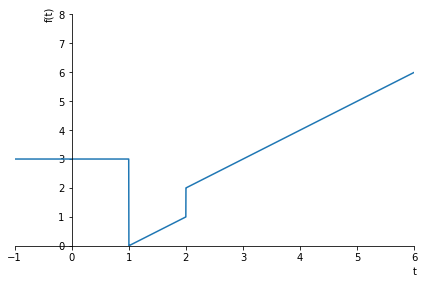

In [14]:
sp.plot(f, xlim=(-1, 6), ylim=(0, 8))

## b) Utilizando transformada de Laplace y con ayuda de los comandos de Python, resuelva la ecuación
## $$ y'''+2y''=1+f(t)$$

## con condiciones $y(0)=y'(0)=0$, $y''(0)=1$, donde $f$ es la función por partes definida en el apartado anterior.
    
   ### Respuesta: 
   Aplicamos transformada de Laplace a la ecuación y obtenemos:
   $$\mathcal{L}\left\lbrace y'''\right\rbrace+2 \mathcal{L}\left\lbrace y''\right\rbrace= \mathcal{L}\left\lbrace 1 \right\rbrace+\mathcal{L}\left\lbrace f(t) \right\rbrace$$
   que corresponde a:
   $$s^3\mathcal{L}\left\lbrace y(t)\right\rbrace-s^2y(0)-sy'(0)-y''(0)+2\left[s^2\mathcal{L}\left\lbrace y(t)\right\rbrace-sy(0)-y'(0) \right] = \dfrac{1}{s}+\mathcal{L}\left\lbrace f(t) \right\rbrace.$$
   Calculamos ahora $\mathcal{L}\left\lbrace f(t) \right\rbrace$:

In [12]:
F=sp.laplace_transform(f,t,s,noconds=True)
F

3/s - 3*exp(-s)/s + exp(-2*s)/s + exp(-s)/s**2

Aplicando las condiciones iniciales establecidas en el enunciado y la expresión que acabamos de calcular tendremos:
$$s^3\mathcal{L}\left\lbrace y(t)\right\rbrace-1+2 s^2\mathcal{L}\left\lbrace y(t)\right\rbrace = \dfrac{1}{s}+\dfrac{3-3e^{-s}+e^{-2s}}{s}+\dfrac{e^{-s}}{s^2}.$$
despejamos $\mathcal{L}\left\lbrace y(t) \right\rbrace$ y tendremos:
$$\mathcal{L}\left\lbrace y(t)\right\rbrace \left( s^3+2s^2 \right) = \dfrac{1}{s}+\dfrac{3-3e^{-s}+e^{-2s}}{s}+\dfrac{e^{-s}}{s^2}+1.$$
$$\mathcal{L}\left\lbrace y(t)\right\rbrace  = \dfrac{1}{s\left( s^3+2s^2 \right)}+\dfrac{3-3e^{-s}+e^{-2s}}{s\left( s^3+2s^2 \right)}+\dfrac{e^{-s}}{s^2\left( s^3+2s^2 \right)}+\dfrac{1}{\left( s^3+2s^2 \right)}.$$
Ahora calculamos la transfromada inversa de Laplace de dicha expresión, para ello definimos:

In [13]:
Y=F/(s**3+2*s**2)+1/(s*(s**3+2*s**2))+1/(s**3+2*s**2)
Y

(3/s - 3*exp(-s)/s + exp(-2*s)/s + exp(-s)/s**2)/(s**3 + 2*s**2) + 1/(s**3 + 2*s**2) + 1/(s*(s**3 + 2*s**2))

y calculamos su transformada inversa:

In [14]:
y=sp.inverse_laplace_transform(Y,s,t,noconds=True)
y

(12*((4*t**2 - 2*t + 1)*exp(2*t) - 1)*Heaviside(t) + (6*(2*t**2 - 10*t - exp(4 - 2*t) + 13)*Heaviside(t - 2) + (4*t**3 - 54*t**2 + 138*t + 21*exp(2 - 2*t) - 109)*Heaviside(t - 1))*exp(2*t))*exp(-2*t)/48

## c) Grafique la solución de la ecuación diferencial y estudie el comportamiento de la solución $y$ conforme $t\to\infty$:
    
   ### Respuesta: 
   Graficamos:

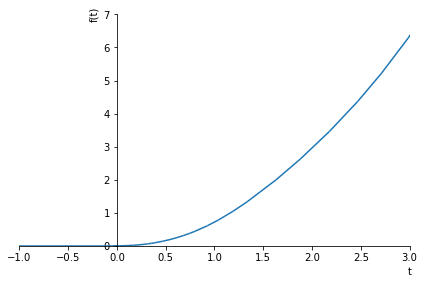

In [15]:
sp.plot(y, xlim=(-1, 3), ylim=(0, 7))

De acuerdo con el gráfico, es claro que la función $y\to\infty$ cuando $t\to \infty $. De manera alternativa es posible calcular $\displaystyle\lim_{t \to \infty} y(t)$ directamente. 